<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Source" data-toc-modified-id="Data-Source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Source</a></span></li><li><span><a href="#Downloading-Dataset" data-toc-modified-id="Downloading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Downloading Dataset</a></span></li><li><span><a href="#Importing-the-libraries" data-toc-modified-id="Importing-the-libraries-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing the libraries</a></span></li><li><span><a href="#Importing-the-Dataset" data-toc-modified-id="Importing-the-Dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Importing the Dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-Info" data-toc-modified-id="Dataset-Info-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Dataset Info</a></span></li><li><span><a href="#Loading-train-images" data-toc-modified-id="Loading-train-images-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Loading train images</a></span></li><li><span><a href="#Loading-test-images" data-toc-modified-id="Loading-test-images-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Loading test images</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Countplot" data-toc-modified-id="Countplot-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Countplot</a></span></li><li><span><a href="#Distplot" data-toc-modified-id="Distplot-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Distplot</a></span></li><li><span><a href="#Unique-images-in-the-dataset" data-toc-modified-id="Unique-images-in-the-dataset-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Unique images in the dataset</a></span></li><li><span><a href="#RGB-histplot-of-images-of-each-class" data-toc-modified-id="RGB-histplot-of-images-of-each-class-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>RGB histplot of images of each class</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Model Building</a></span></li><li><span><a href="#Evaluating-the-model-performance" data-toc-modified-id="Evaluating-the-model-performance-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Evaluating the model performance</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-loss-and-accuracy-curves-for-training-and-validation" data-toc-modified-id="Plotting-the-loss-and-accuracy-curves-for-training-and-validation-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>Plotting the loss and accuracy curves for training and validation</a></span></li><li><span><a href="#Plotting-the-Confusion-Matrix" data-toc-modified-id="Plotting-the-Confusion-Matrix-6.6.2"><span class="toc-item-num">6.6.2&nbsp;&nbsp;</span>Plotting the Confusion Matrix</a></span></li></ul></li></ul></li></ul></div>

# Problem Statement

Traffic signs are an integral part of our road infrastructure. Without such useful signs, we would most likely be faced with more accidents, as drivers would not be given critical feedback on how fast they could safely go, or informed about road works, sharp turn, or school crossings ahead.
Naturally, autonomous vehicles must also abide by road legislation and therefore recognize and understand traffic signs.
The goal of traffic sign detection is to identify the region of interest (ROI) in which a traffic sign is supposed to be found and verify the sign after a large-scale search for candidates within an image.

# Data Source

Kaggle - https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# Downloading Dataset

In [1]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muditmb","key":"e08f9d8749d62624de0b25da61e3f398"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import save

# Importing the Dataset

In [4]:
df_train = pd.read_csv('Train.csv')
df_train['Path'] = df_train['Path'].str.lower()
df_train['ClassId'] = df_train['ClassId'].apply(str)

In [5]:
df_test = pd.read_csv('Test.csv')
df_test['Path'] = df_test['Path'].str.lower()
df_test['ClassId'] = df_test['ClassId'].apply(str)

## Dataset Info

In [6]:
df_train.shape

(39209, 8)

In [7]:
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,train/20/00020_00000_00004.png


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  object
 7   Path     39209 non-null  object
dtypes: int64(6), object(2)
memory usage: 2.4+ MB


In [9]:
df_test.shape

(12630, 8)

In [10]:
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,test/00000.png
1,42,45,5,5,36,40,1,test/00001.png
2,48,52,6,6,43,47,38,test/00002.png
3,27,29,5,5,22,24,33,test/00003.png
4,60,57,5,5,55,52,11,test/00004.png


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  object
 7   Path     12630 non-null  object
dtypes: int64(6), object(2)
memory usage: 789.5+ KB


## Loading train images

In [12]:
from tqdm import tqdm
from keras.preprocessing import image
train_img = []                          
for i in tqdm(range(df_train.shape[0])):
    img = image.load_img(df_train['Path'][i], target_size = (64, 64, 3)) 
    img = image.img_to_array(img) 
    img = img/255
    train_img.append(img)  
X = np.array(train_img)

100%|██████████| 39209/39209 [00:13<00:00, 2828.39it/s]


## Loading test images

In [13]:
test_img = []                          
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img(df_test['Path'][i], target_size = (64, 64, 3)) 
    img = image.img_to_array(img) 
    img = img/255
    test_img.append(img)  
y = np.array(test_img)

100%|██████████| 12630/12630 [00:04<00:00, 2747.22it/s]


In [14]:
save('X_train.npy', X)
save('X_test.npy', y)

In [15]:
x_train = np.load('X_train.npy', allow_pickle=True)
x_test = np.load('X_test.npy', allow_pickle=True)

In [16]:
print(x_train.shape)
print(x_test.shape)

(39209, 64, 64, 3)
(12630, 64, 64, 3)


In [17]:
y_train = df_train['ClassId']
from tensorflow.keras.utils import to_categorical
print(y_train.shape)
y_train = to_categorical(y_train, num_classes=43)
print(y_train.shape)
print(y_train[0])

(39209,)
(39209, 43)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
y_test = df_test['ClassId']
from tensorflow.keras.utils import to_categorical
print(y_test.shape)
y_test = to_categorical(y_test, num_classes=43)
print(y_test.shape)
print(y_test[0])

(12630,)
(12630, 43)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Exploratory Data Analysis

## Countplot

To determine the count of each label in the train  and test data.

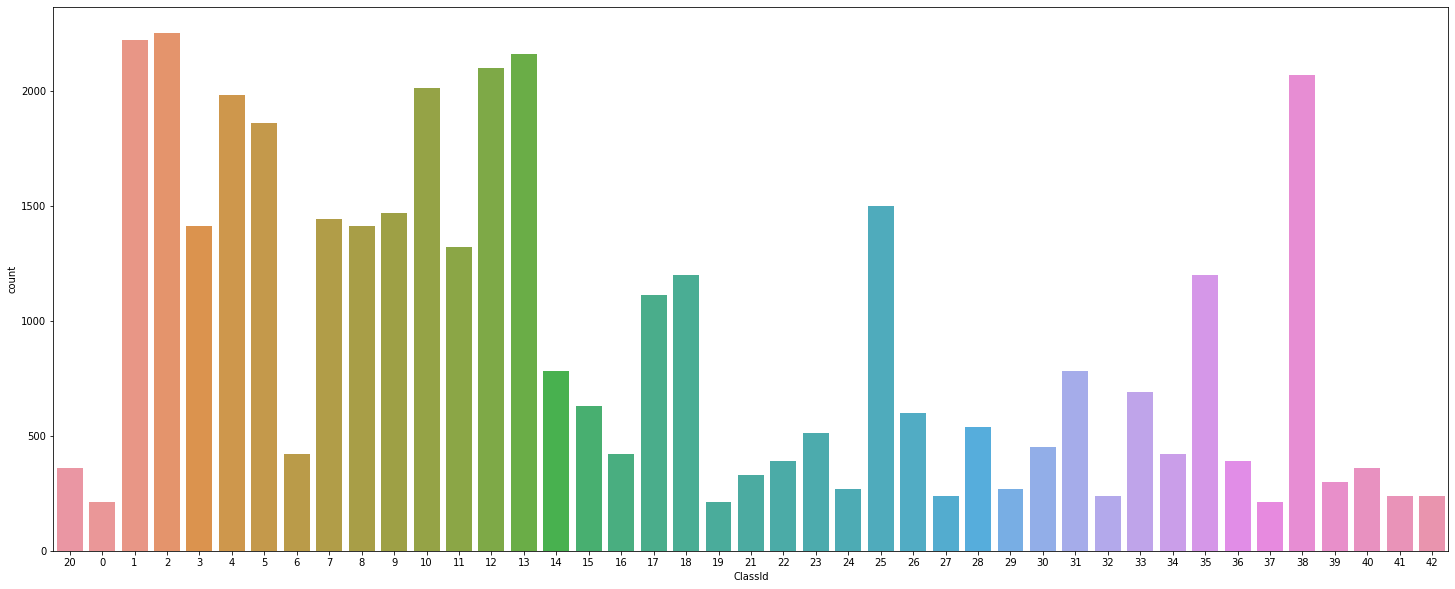

In [19]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((25,10))
sns.countplot(data = df_train, x = 'ClassId', )
plt.show()

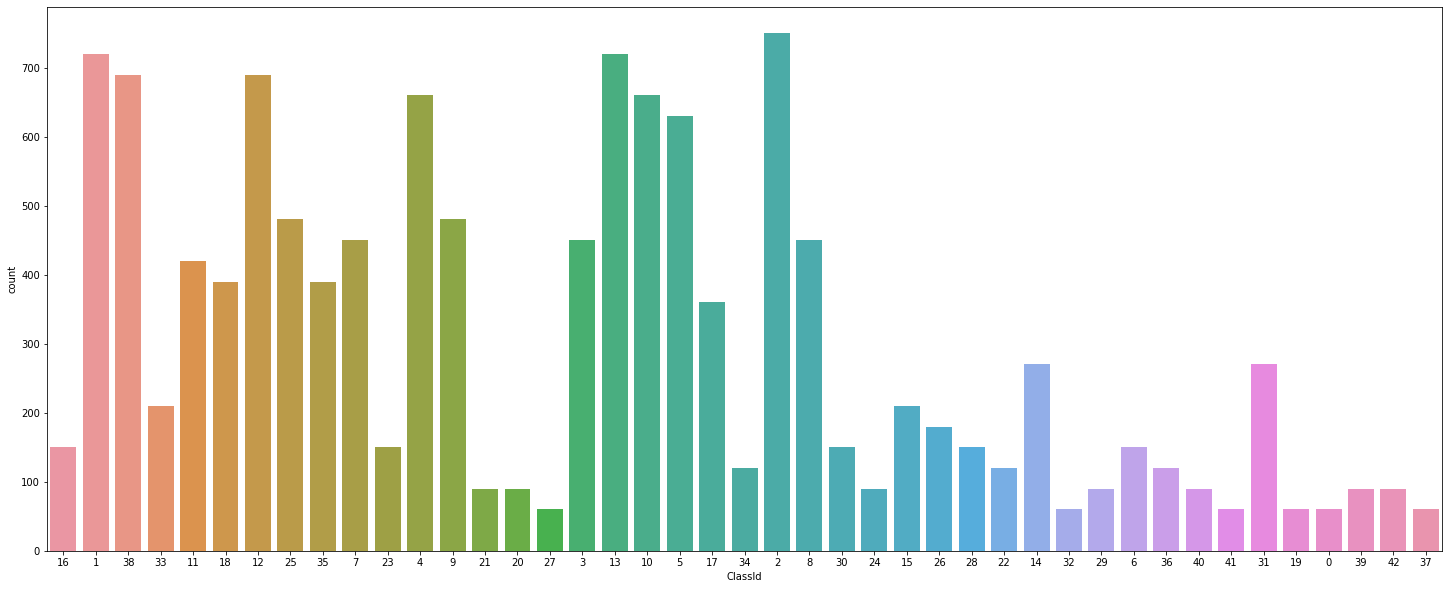

In [20]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((25,10))
sns.countplot(data = df_test, x = 'ClassId', )
plt.show()

## Distplot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

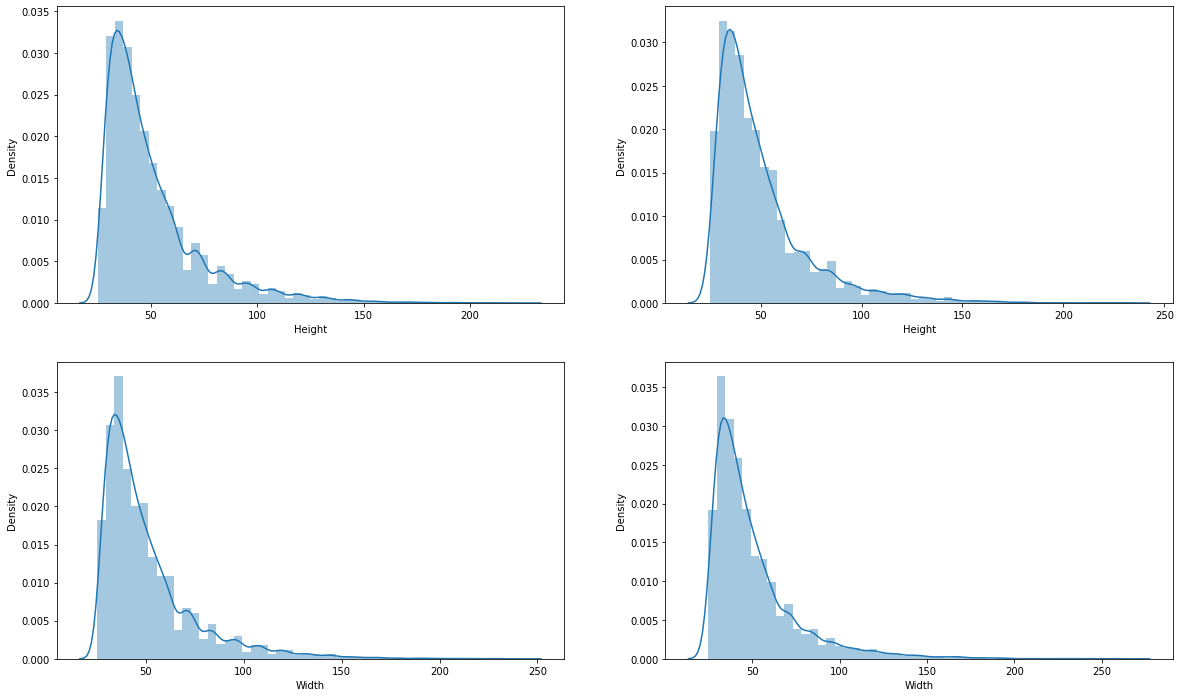

In [21]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches((20,12))
sns.distplot(df_train['Height'], ax = ax[0][0])
fig.set_size_inches((20,12))
sns.distplot(df_test['Height'], ax = ax[0][1])
fig.set_size_inches((20,12))
sns.distplot(df_train['Width'], ax = ax[1][0])
fig.set_size_inches((20,12))
sns.distplot(df_test['Width'], ax = ax[1][1])
plt.show()

## Unique images in the dataset

In [22]:
class_names_list,index=np.unique(df_train['ClassId'],return_index=True)


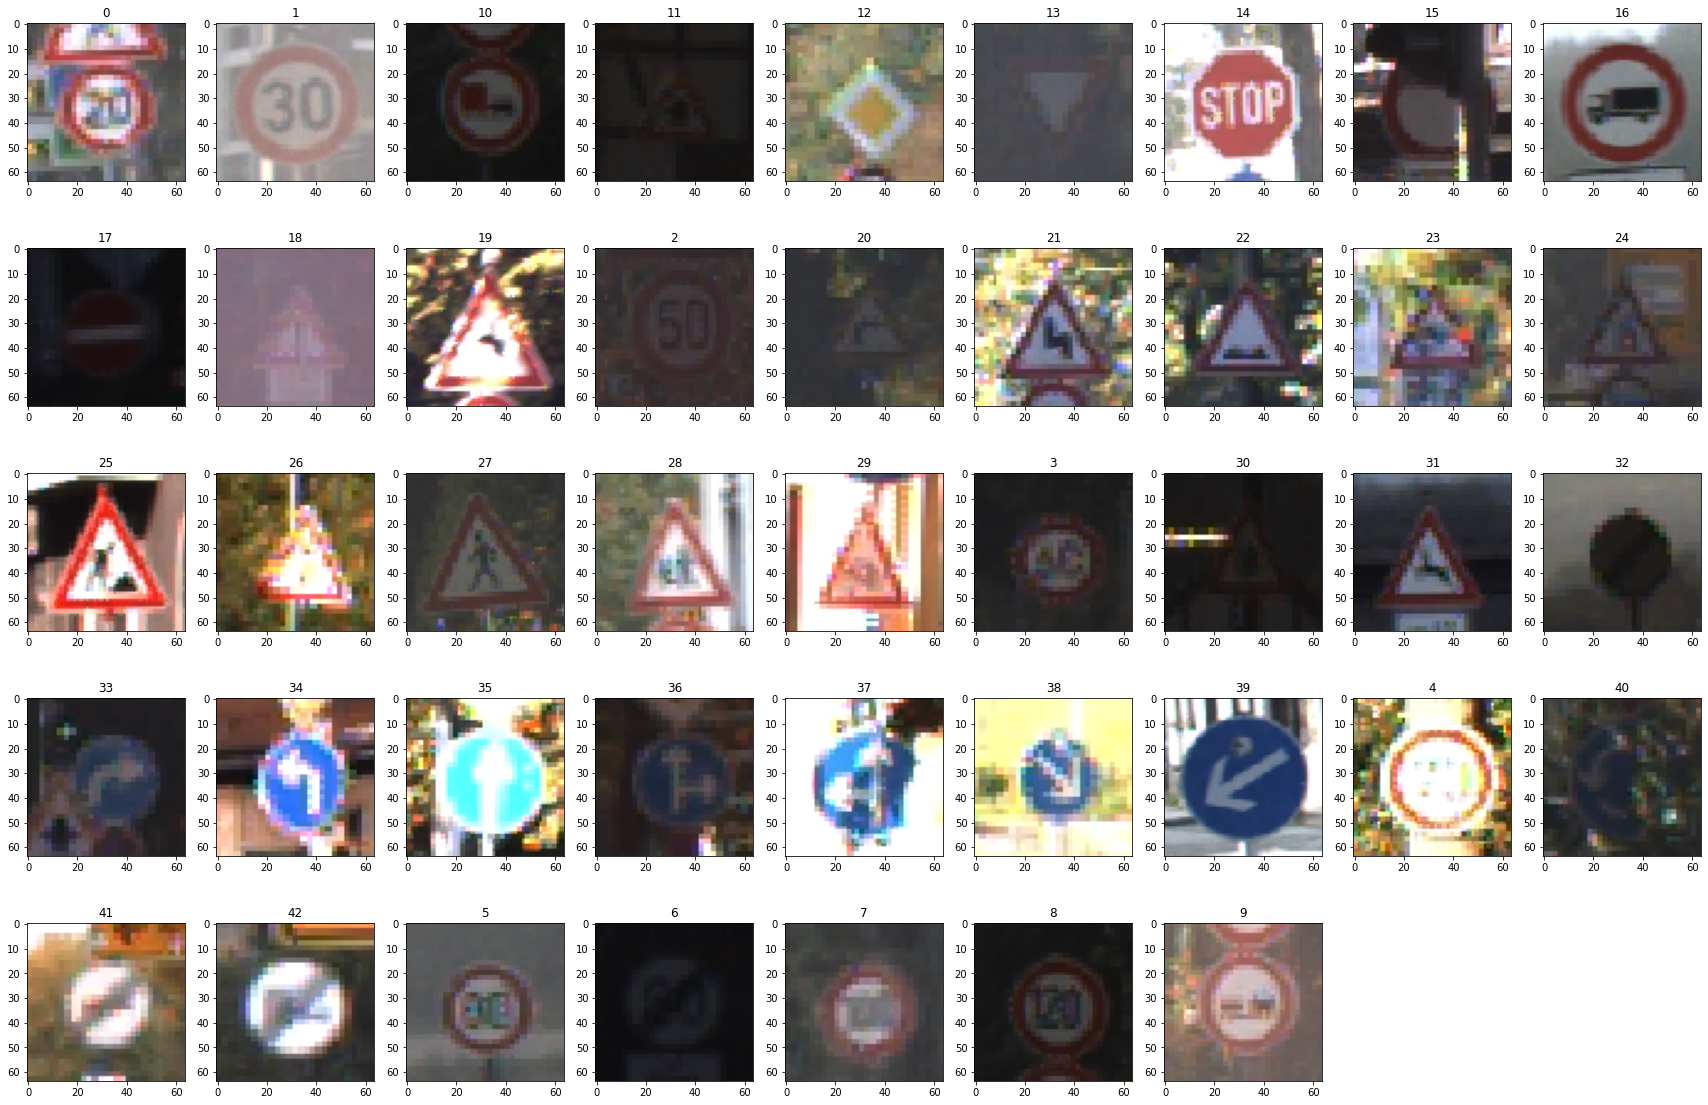

In [23]:
k=1
plt.figure(figsize=(30,20))
for i in index:
    plt.subplot(5,9,k)
    plt.imshow(x_train[i])
    plt.title(class_names_list[k-1])
    k+=1
plt.show()

## RGB histplot of images of each class

In [25]:
import cv2

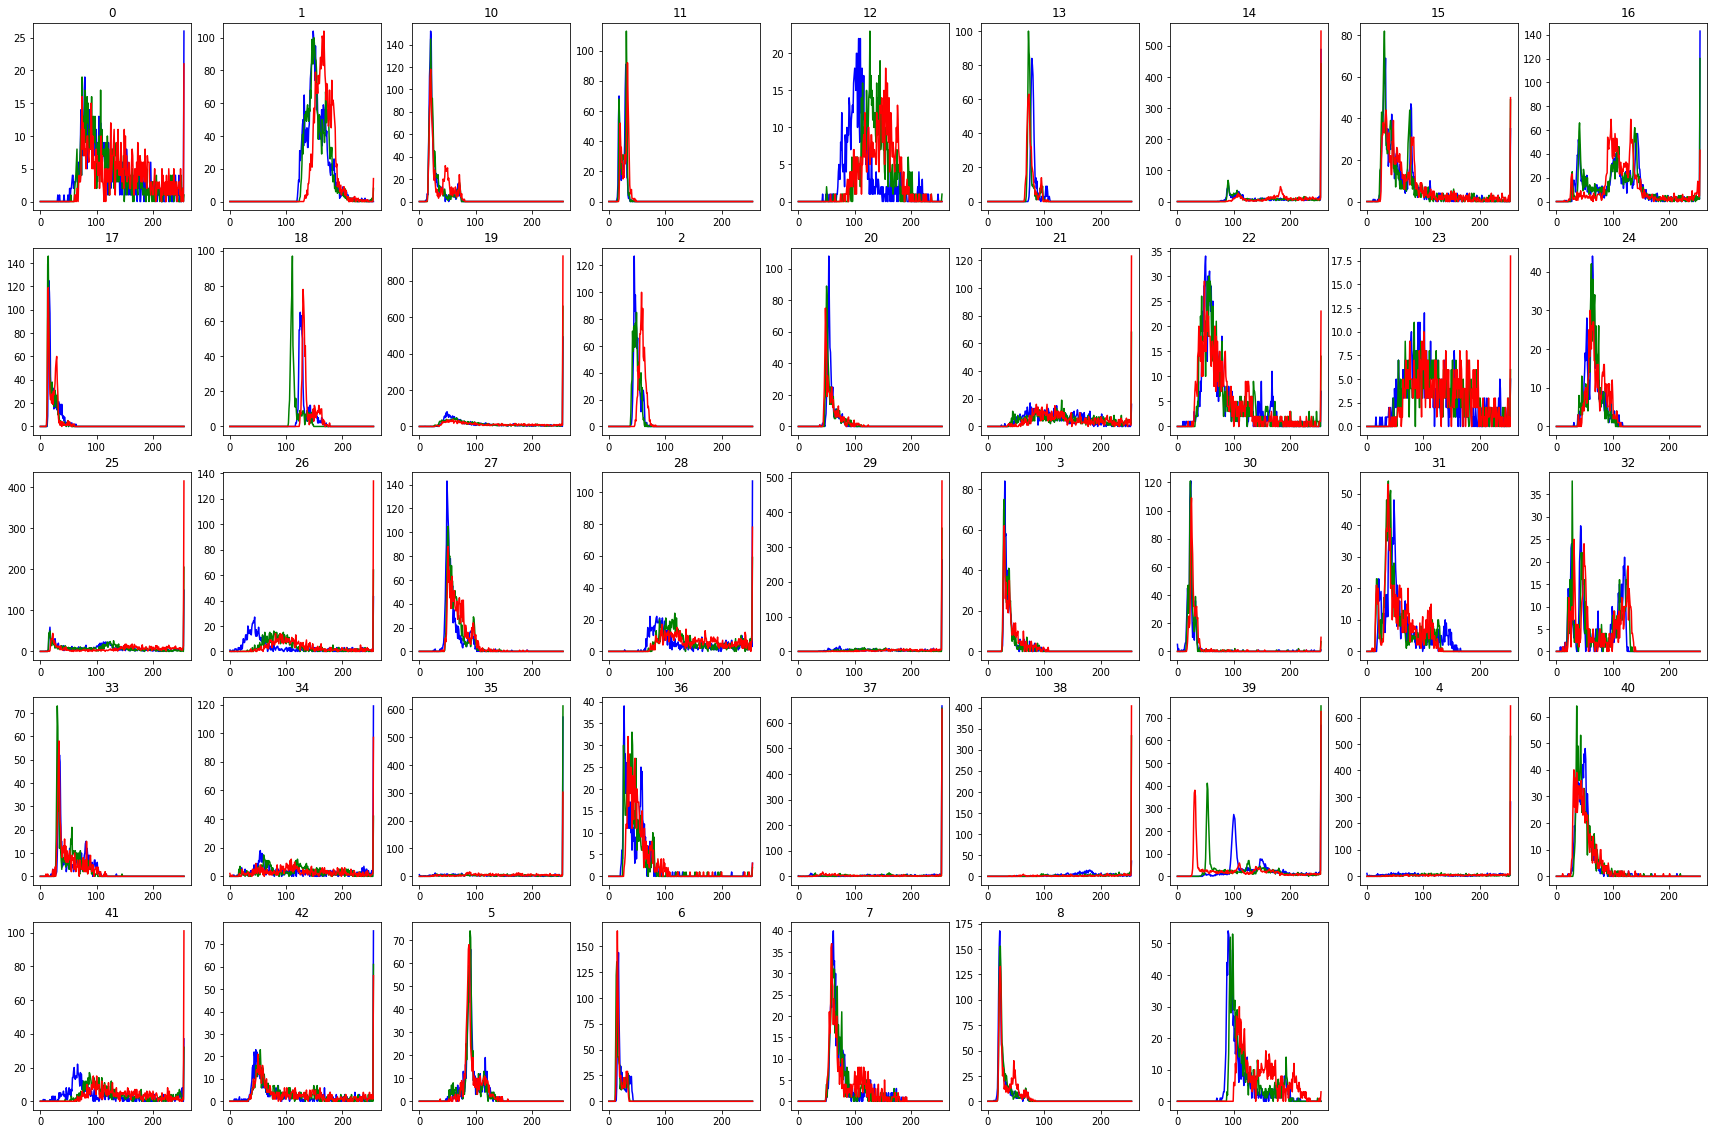

In [26]:
k=1
images=df_train['Path']
color = ('b','g','r')
plt.figure(figsize=(30,20))
for i in index:
    plt.subplot(5,9,k)
    img=cv2.imread(images[i])
    for j,col in enumerate(color):
      histr = cv2.calcHist([img],[j],None,[256],[0,256])
      plt.plot(histr,color=col)
      plt.title(class_names_list[k-1])
      
    k+=1
plt.show()

## Model Building

In [27]:
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout

In [28]:
cnn = tf.keras.models.Sequential()

cnn.add(Conv2D(32,(3,3),input_shape=(64,64,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
cnn.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(64,(3,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
cnn.add(Conv2D(64,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(128,(3,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
cnn.add(Conv2D(128,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=43,activation='softmax'))

In [29]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0

In [31]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, shear_range=10,
                        height_shift_range=0.1, zoom_range=0.2)
datagen.fit(x_train)
datagen.fit(x_test)

In [32]:
history=cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
1226/1226 [==============================] - 25s 14ms/step - loss: 2.3669 - accuracy: 0.3462 - val_loss: 0.3430 - val_accuracy: 0.9101
Epoch 2/10
1226/1226 [==============================] - 17s 13ms/step - loss: 0.1282 - accuracy: 0.9618 - val_loss: 0.2520 - val_accuracy: 0.9402
Epoch 3/10
1226/1226 [==============================] - 17s 14ms/step - loss: 0.0604 - accuracy: 0.9809 - val_loss: 0.1797 - val_accuracy: 0.9559
Epoch 4/10
1226/1226 [==============================] - 18s 14ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.2671 - val_accuracy: 0.9417
Epoch 5/10
1226/1226 [==============================] - 18s 14ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.2002 - val_accuracy: 0.9582
Epoch 6/10
1226/1226 [==============================] - 17s 14ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.1772 - val_accuracy: 0.9644
Epoch 7/10
1226/1226 [==============================] - 17s 14ms/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.2221 -

## Evaluating the model performance

### Plotting the loss and accuracy curves for training and validation

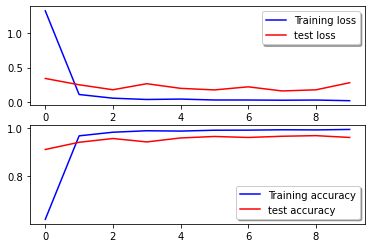

In [33]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="test loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="test accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Plotting the Confusion Matrix

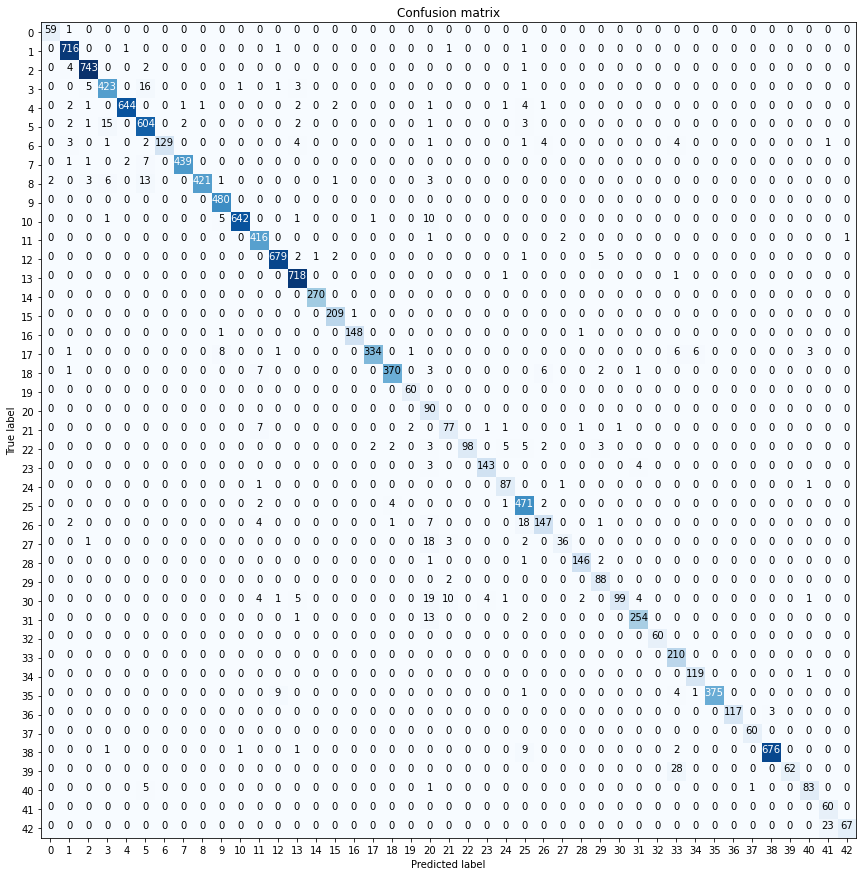

In [34]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)


    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = cnn.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1) 
# plot the confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(confusion_matrix(y_true, y_pred_classes), classes = range(43)) 

In [35]:
cnn.save("model_german_traffic_sign.h5")